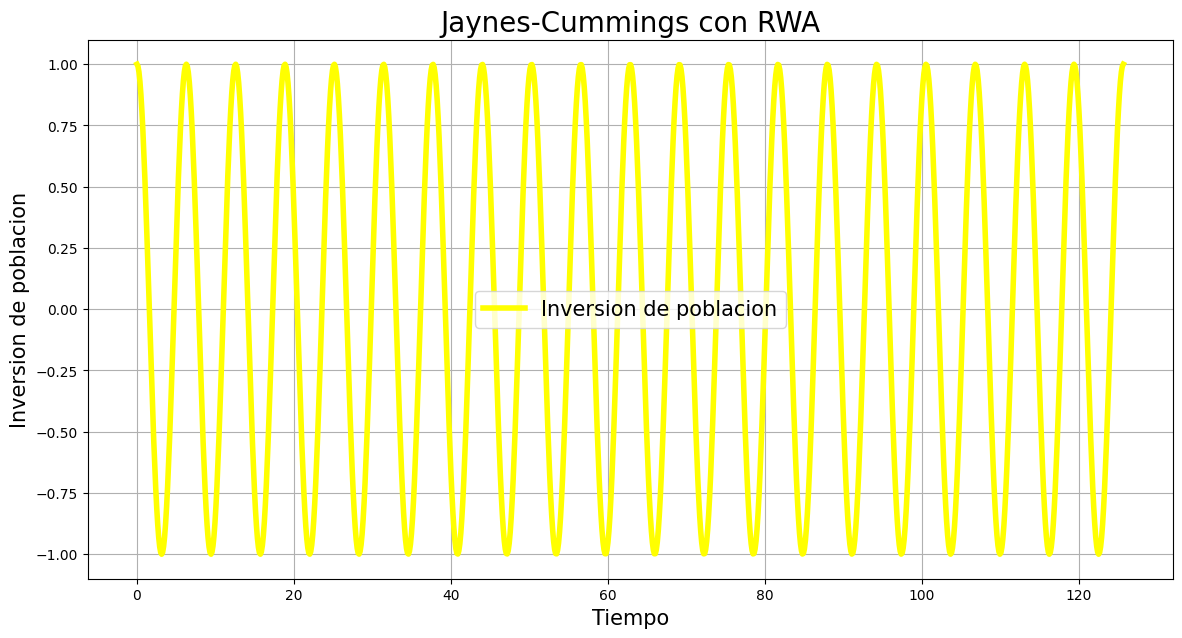

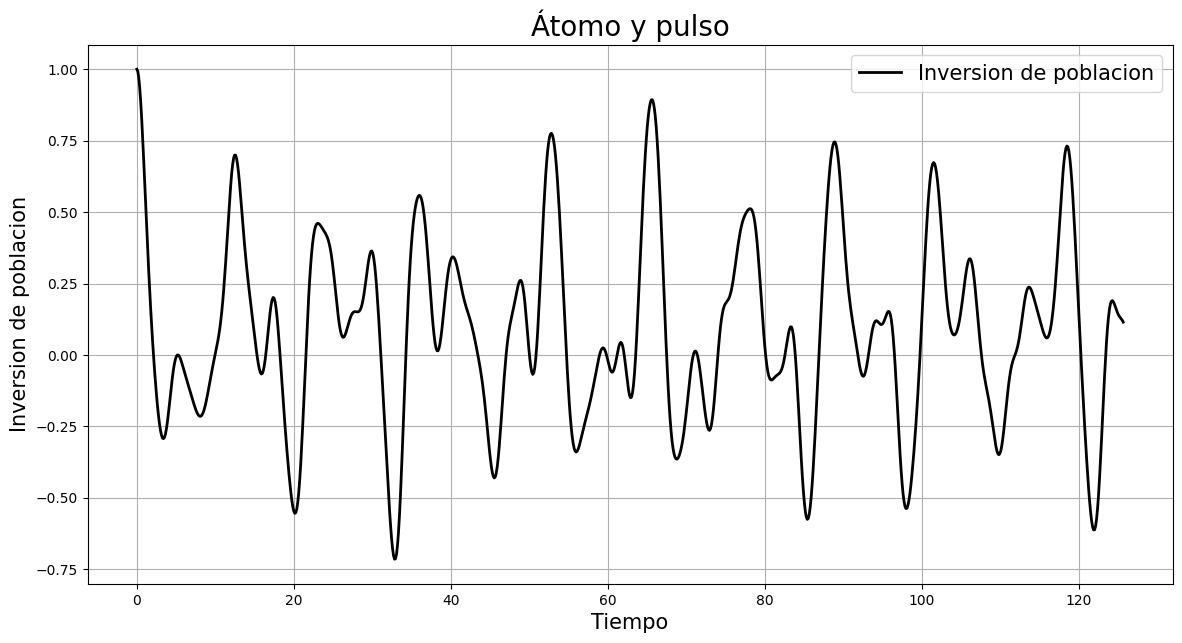

In [1]:
# Importamos las librerias necesarias
import numpy as np
import matplotlib.pyplot as plt
from qutip import *
from scipy import *

# Definimos las constantes necesarias
hbar = 1.0
N = 2
N1=50
#N1=3
omega_l = 0.5
omega_r = 0.5
omega_m = 0.5
g=0.5
mu=0.5

T=40*np.pi
# Definimos la funcion que nos da el pulso
def pulso(t, args):
    return (np.sin(np.pi*t/T)**2) * np.cos(omega_l * (t-T/2))



psi01 = tensor(basis(N1, 0), basis(2, 1))  # start with an ground state for the atoms and zero photons


# operators
a = tensor(destroy(N1), qeye(2))
sm = tensor(qeye(N1), destroy(2))
#Definamos sigma x y sigma y#plt.plot(t,-(result.expect[2]-result.expect[3]),label="Sigma y - Sigma x")


# Hamiltonian

H_0 = omega_r * a.dag() * a + 0.5*omega_m * (sm.dag() * sm-sm *sm.dag()) + g * (a.dag() + a) * (sm + sm.dag())
H_01 = omega_r * a.dag() * a + 0.5*omega_m * (sm.dag() * sm-sm *sm.dag()) + g * (a.dag()*sm + a*sm.dag()) 
H02 = omega_r * a.dag() * a + 0.5*omega_m * (sm.dag() * sm-sm *sm.dag())

# Definimos el tiempo discreto
num_steps = 1000
t = np.linspace(0, T, num_steps)

HI1 = (sm + sm.dag())*mu
HI2 = (a + a.dag())*0.5
HI3 = ((sm + sm.dag()) + (a + a.dag())*0.5)
HI4 = g * (a.dag()*sm + a*sm.dag())

# Definimos el Hamiltoniano total
H= [H_01, [HI1, pulso]]
H3 = [H02, [HI1, pulso]]


# Resolvemos la ecuacion diferencial
result = mesolve(H_01, psi01, t, [], [a.dag() * a, (sm.dag() * sm-sm *sm.dag()),sm *sm.dag(),sm.dag() * sm])
result2 = mesolve(H_0, psi01, t, [], [a.dag() * a, (sm.dag() * sm-sm *sm.dag()),sm *sm.dag(),sm.dag() * sm])

# Graficamos la inversion de poblacion
plt.figure(figsize=(14,7))
plt.title("Jaynes-Cummings con RWA",fontsize=20)
#plt.plot(t, result.expect[0], label="Número de fotones")
#plt.figure(figsize=(10,5))
plt.plot(t, result.expect[1], label="Inversion de poblacion",color='yellow',lw=4)
#plt.plot(t, pulso2(t)*0.5, label="Pulso")
#plt.plot(t, inversion0(t,g,n=6), label="Inversion de poblacion analitica con n=6",color='black',lw=1.5)
#plt.plot(t, result.expect[0], label="Número de fotones",color='red')
#plt.plot(t, result2.expect[1], label="Inversion de poblacion",lw=1,color='black')
#plt.plot(t, result.expect[2], label="Sigma x")
#plt.plot(t, result.expect[3], label="Sigma y")
plt.grid()
plt.xlabel('Tiempo',fontsize=15)
plt.ylabel('Inversion de poblacion',fontsize=15)

plt.legend(fontsize=15)
plt.show()


plt.figure(figsize=(14,7))
plt.title("Átomo y pulso",fontsize=20)
#plt.plot(t, result.expect[0], label="Número de fotones")
#plt.figure(figsize=(10,5))
plt.plot(t, result2.expect[1], label="Inversion de poblacion",color='black',lw=2)
#plt.plot(t, pulso2(t)*0.5, label="Pulso")
#plt.plot(t, inversion0(t,g,n=6), label="Inversion de poblacion analitica con n=6 y RWA",color='black',lw=1.5)
#plt.plot(t, result.expect[0], label="Número de fotones",color='red')
#plt.plot(t, result2.expect[1], label="Inversion de poblacion",lw=1,color='black')
#plt.plot(t, result.expect[2], label="Sigma x")
#plt.plot(t, result.expect[3], label="Sigma y")
plt.grid()
plt.xlabel('Tiempo',fontsize=15)
plt.ylabel('Inversion de poblacion',fontsize=15)

plt.legend(fontsize=15)
plt.show()